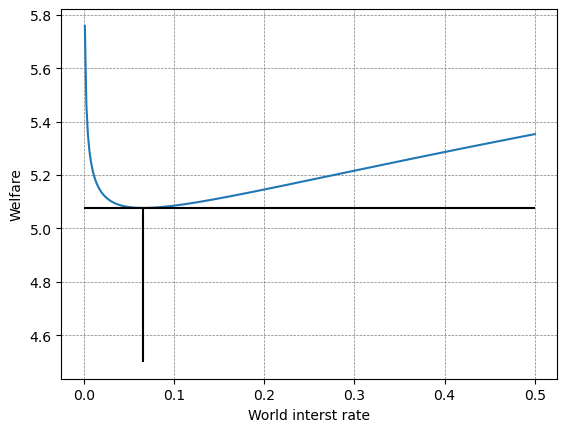

<Figure size 640x480 with 0 Axes>

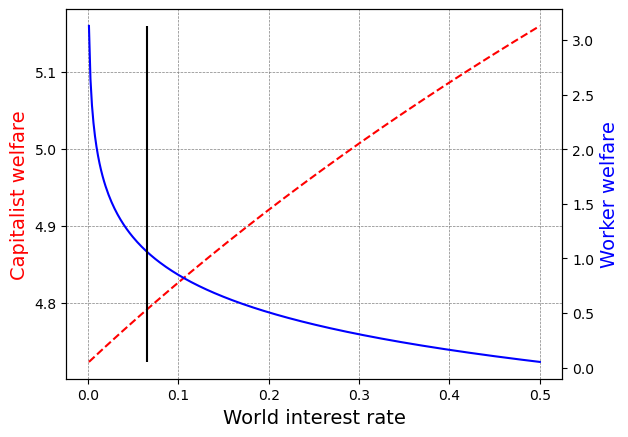

<Figure size 640x480 with 0 Axes>

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 11 15:29:36 2022

@author: qwp970
"""


import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits import mplot3d
import csv

leng= 300

alpha = 1/3
delta = 0.1
beta = 0.99
r = 0.04

k0 = (r/alpha)**(1/(alpha-1))
a0 = k0


# Closed economy: k1 is determined by savings decisions
def func_b(k1):
    c0 = k0**(alpha) + k0*(1-delta) - k1
    c1 = k1**(alpha) + k1*(1-delta)
    
    U = -np.log(c0) -beta*np.log(c1)
    return U

# Open economy
def func_a(a1):
    k1 = (r/alpha)**(1/(alpha-1))
    c0 = a0**(alpha) + a0*(1-delta) - a1
    c1 = k1**(alpha) - (k1-a1)*r + a1*(1-delta)
    
    U = -np.log(c0) - beta*np.log(c1)
    return U

k_def = optimize.minimize(func_b,0.1, tol=1e-7)
U0 = func_b(k_def.x)
r0 = alpha*k_def.x**(alpha-1)

rvec = np.linspace(0.001,0.5,leng)
resvec = np.zeros(leng)
for ir in range(leng):
    r = rvec[ir]
    a_def = optimize.minimize(func_a,1, tol=1e-7)
    resvec[ir] = -func_a(a_def.x)[0]

plt.plot(rvec,resvec)
plt.hlines(-U0[0],0,0.5, color = 'black')
plt.vlines(r0,4.5,-U0[0], color = 'black')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel('World interst rate')
plt.ylabel('Welfare')
plt.savefig('gains.pdf')
plt.show()

###############################################################################
## Inequality
def func_b_euler(k1):
    w0 = k0**alpha * (1-alpha)
    w1 = k1**alpha * (1-alpha)
    c0 = k0**(alpha) + k0*(1-delta) - k1 - w0
    c1 = k1**(alpha) + k1*(1-delta) - w1
    
    euler = 1/c0 - 1/c1*beta*(1+alpha*k1**(alpha-1)-delta)
    return euler

k_def1 = optimize.newton(func_b_euler,1, tol=1e-7)
## Capitalist utility
w0 = k0**alpha * (1-alpha)
w1 = k_def1**alpha * (1-alpha)
c0 = k0**(alpha) + k0*(1-delta) - k_def1 - w0
c1 = k_def1**(alpha) + k_def1*(1-delta) - w1

U_cap = np.log(c0) + beta * np.log(c1)
U_work = np.log(w0) + beta * np.log(w1)



def func_b_euler_open(a1):
    k1 = (r/alpha)**(1/(alpha-1))

    w0 = k0**alpha * (1-alpha)
    w1 = k1**alpha * (1-alpha)
    
    c0 = a0**(alpha) + a0*(1-delta) - a1 - w0
    c1 = k1**(alpha) - (k1-a1)*r + a1*(1-delta) -w1
    
    euler = 1/c0 - 1/c1*beta*(1+r-delta)
    return euler

rvec = np.linspace(0.001,0.5,leng)
resvec_w = np.zeros(leng)
resvec_k = np.zeros(leng)
for ir in range(leng):
    r = rvec[ir]
    resvec[ir] = -func_a(a_def.x)[0]

    a_def1 = optimize.newton(func_b_euler_open,1, tol=1e-7)
    ## Capitalist utility
    k1 = (r/alpha)**(1/(alpha-1))
    w0 = k0**alpha * (1-alpha)
    w1 = k1**alpha * (1-alpha)
        
    c0 = a0**(alpha) + a0*(1-delta) - a_def1 - w0
    c1 = k1**(alpha) - (k1-a_def1)*r + a_def1*(1-delta) -w1
    
    resvec_k[ir] = np.log(c0) + beta * np.log(c1)
    resvec_w[ir] = np.log(w0) + beta * np.log(w1)


# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(rvec,resvec_k, color="red", linestyle = "dashed")
# set x-axis label
ax.set_xlabel("World interest rate", fontsize = 14)
# set y-axis label
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

ax.set_ylabel("Capitalist welfare", color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(rvec, resvec_w,color="blue")
plt.vlines(r0,np.min(resvec_w),np.max(resvec_w),color = 'black')
ax2.set_ylabel("Worker welfare",color="blue",fontsize=14)
plt.savefig('heterogeneity.pdf')
plt.show()

